### Introduction

In this project, I'm analysing the chocolate sales data, with the goal to better understand the products' development and costumer behaviors. The analysis seeks to answer questions such as:


- Which Sales Person sold the most?
- Which Sales Person sold the most to each country?
- Which Country had the highest revenue?
- Which Country had bought the most?
- What is the top three products sold?
- What are the products with the high demand in each country?
- In which month did sales peak?
- Which product had the highest revenue?
- What is the unit price?
- What was the most stable month?

And then use those insights to make more strategic decisions to optimize sales and identify growth opportunities.

### Data loading and Initial Treatments

In [71]:
import pandas as pd            # Data manipulation
import numpy as np             # numeric operations
import matplotlib.pyplot as plt  # Basic Chart
import seaborn as sns          # Visualization
import plotly.graph_objects as go # Interactive Chart
import plotly.express as px # Interactive Chart

In [72]:
#reading the csv file and viewing for the first time
df = pd.read_csv('Chocolate Sales.csv') 
display(df)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [73]:
#Making the change on the column 'Amount' to get int/float values instead of object
amount_dict = {'Amount': [row.replace('$', '').replace(',', '').replace(' ', '') for row in df['Amount']]}
df['Amount'] = amount_dict['Amount']
df['Amount'] = df['Amount'].astype(int)

#fixing the format on Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

display(df)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086,384


In [74]:
#checking for any inconsistent or null values
total_null = df.isnull().sum()
df.info()
print(total_null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int32         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(3)
memory usage: 47.1+ KB
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [75]:
df['Month'] = df['Date'].dt.month
df = df.drop('Date', axis=1)
display(df)

,Sales Person,Country,Product,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,5320,180,1
1,Van Tuxwell,India,85% Dark Bars,7896,94,8
2,Gigi Bohling,India,Peanut Butter Cubes,4501,91,7
3,Jan Morforth,Australia,Peanut Butter Cubes,12726,342,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685,184,2
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,4410,323,5
1090,Jehu Rudeforth,USA,White Choc,6559,119,6
1091,Ches Bonnell,Canada,Organic Choco Syrup,574,217,7
1092,Dotty Strutley,India,Eclairs,2086,384,7


### Exploratory Analysis

1 - Which Sales Person has the highest revenue?

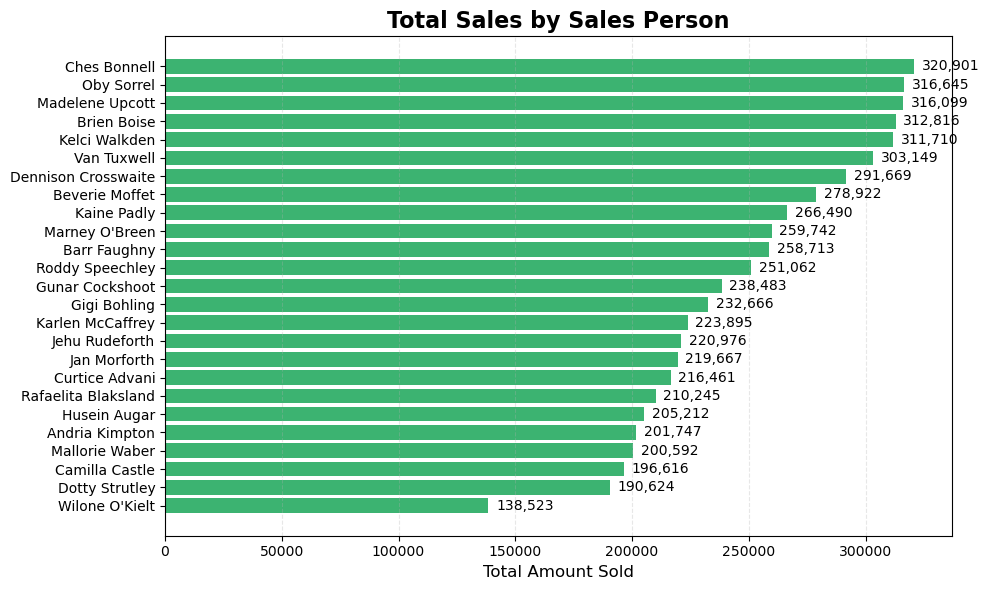

Sales Person
Ches Bonnell       320901
Oby Sorrel         316645
Madelene Upcott    316099
Name: Amount, dtype: int32

Sales Person
Camilla Castle    196616
Dotty Strutley    190624
Wilone O'Kielt    138523
Name: Amount, dtype: int32

In [78]:
# Group total sales amount by Sales Person
sales_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=True)

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(sales_by_person.index, sales_by_person.values, color='mediumseagreen')

# Add value labels to the end of each bar
for i, value in enumerate(sales_by_person.values):
    ax.text(value + max(sales_by_person.values)*0.01, i, f'{value:,.0f}', va='center')

# Visual styling
ax.set_title('Total Sales by Sales Person', fontsize=16, weight='bold')
ax.set_xlabel('Total Amount Sold', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

display(sales_by_person.sort_values(ascending=False).head(3))
display(sales_by_person.sort_values(ascending=False).tail(3))

2 - Which Sales Person sold the most to each country??

In [80]:
# Group by Country and Sales Person, then sum Amount
top_sellers = df.groupby(['Country', 'Sales Person'])['Amount'].sum().reset_index()

# Get the top Sales Person per country
top_per_country = top_sellers.sort_values('Amount', ascending=False).groupby('Country').first().reset_index()

display(top_per_country)


,Country,Sales Person,Amount
0,Australia,Mallorie Waber,71134
1,Canada,Beverie Moffet,71995
2,India,Ches Bonnell,98763
3,New Zealand,Madelene Upcott,67550
4,UK,Madelene Upcott,71330
5,USA,Dennison Crosswaite,69545


3 - Which Country had the highest revenue?

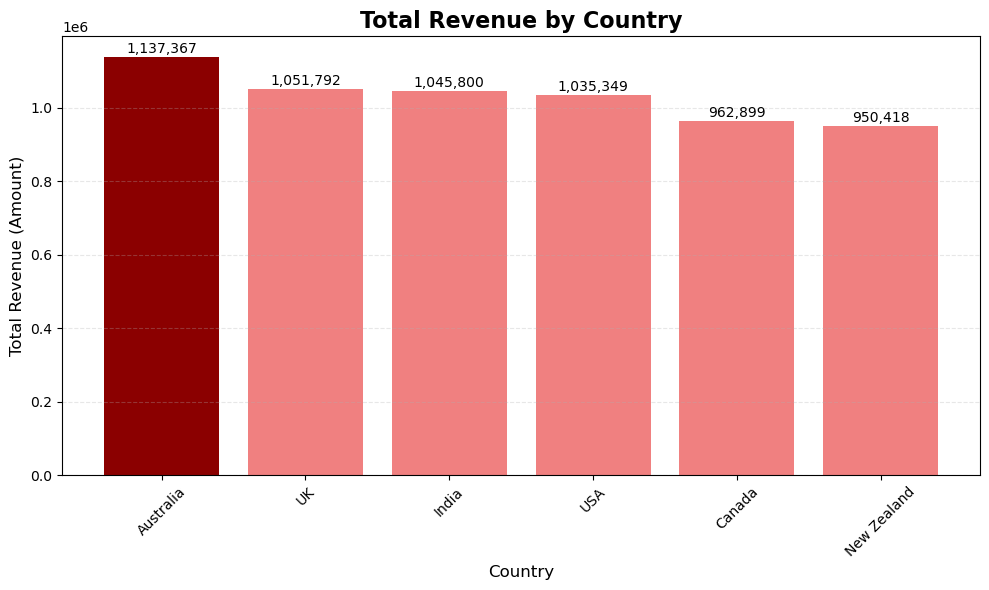

The country with the highest revenue is Australia with total revenue of US$1,137,367.00.


In [82]:
# Group by Country and sum the Amount to get total revenue per country
revenue_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

# Plot a bar chart to visualize the total revenue per country
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(revenue_by_country.index, revenue_by_country.values, color='lightcoral')

# Add value labels on top of the bars
for i, value in enumerate(revenue_by_country.values):
    ax.text(i, value + max(revenue_by_country.values) * 0.01, f'{value:,.0f}', ha='center')

# Highlight the country with the highest revenue
ax.bar(revenue_by_country.idxmax(), revenue_by_country.max(), color='darkred')

# Visual styling
ax.set_title('Total Revenue by Country', fontsize=16, weight='bold')
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Total Revenue (Amount)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the country with the highest revenue
highest_revenue_country = revenue_by_country.idxmax()
highest_revenue_value = revenue_by_country.max()
print(f"The country with the highest revenue is {highest_revenue_country} with total revenue of US${highest_revenue_value:,.2f}.")

4 - Which Country had bought the most?

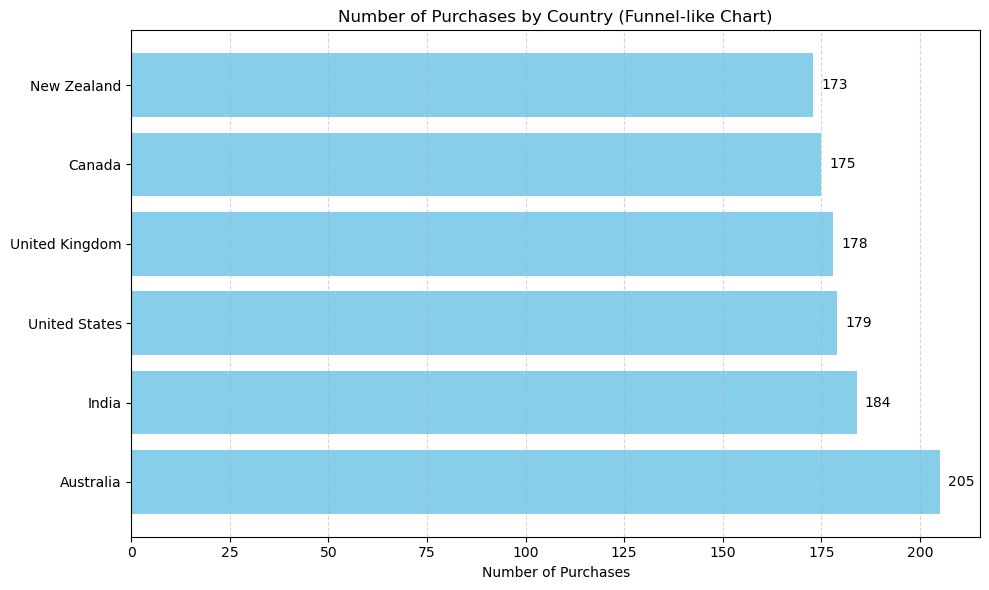

In [112]:
# Count purchases per country (simulando com os dados do seu DataFrame)
purchases_by_country = df['Country'].value_counts().reset_index()
purchases_by_country.columns = ['Country', 'Purchases']

# Fix country names for Matplotlib
country_mapping = {
    'UK': 'United Kingdom',
    'USA': 'United States'
}
purchases_by_country['Country'] = purchases_by_country['Country'].replace(country_mapping)

# Sort by the number of purchases to make the funnel
purchases_by_country = purchases_by_country.sort_values('Purchases', ascending=False)

# Create the funnel-like bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
ax.barh(purchases_by_country['Country'], purchases_by_country['Purchases'], color='skyblue')

# Add value labels at the end of each bar
for i, (value, label) in enumerate(zip(purchases_by_country['Purchases'], purchases_by_country['Country'])):
    ax.text(value + max(purchases_by_country['Purchases']) * 0.01, i, str(value), va='center')

# Set labels and title
ax.set_xlabel('Number of Purchases')
ax.set_title('Number of Purchases by Country (Funnel-like Chart)')
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

5 - What is the top three products sold?

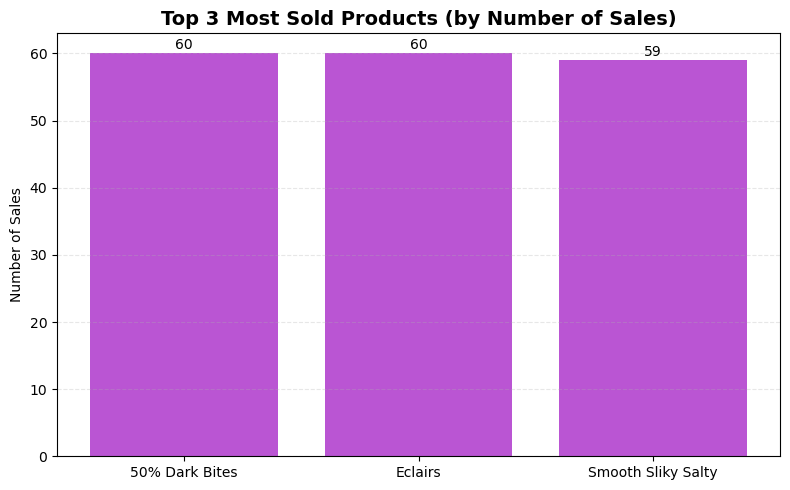

Top 3 most sold products (by frequency):
Product
50% Dark Bites        60
Eclairs               60
Smooth Sliky Salty    59
Name: count, dtype: int64


In [86]:
top_products = df['Product'].value_counts().head(3)

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(top_products.index, top_products.values, color='mediumorchid')

# Add value labels
for i, value in enumerate(top_products.values):
    ax.text(i, value + max(top_products.values) * 0.01, f'{value}', ha='center')

# Styling
ax.set_title('Top 3 Most Sold Products (by Number of Sales)', fontsize=14, weight='bold')
ax.set_ylabel('Number of Sales')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print result
print("Top 3 most sold products (by frequency):")
print(top_products)

6 - What are the products with the high demand in each country?

In [88]:
product_demand = df[['Country', 'Product', 'Amount', 'Boxes Shipped']].groupby(['Country', 'Product'], as_index=False).sum()
for country in list(product_demand['Country'].unique()):
    top_product = product_demand.loc[product_demand['Country'] == country]
    top_product = top_product[['Product', 'Amount', 'Boxes Shipped']].groupby('Product').sum()
    print(f'Top products for {country}')
    display(top_product.sort_values(by='Boxes Shipped', ascending=False).head(3))


Top products for Australia


,Amount,Boxes Shipped
Product,,
50% Dark Bites,89222,3182
Almond Choco,46879,2174
70% Dark Bites,39354,2103


Top products for Canada


,Amount,Boxes Shipped
Product,,
Choco Coated Almonds,57463,2452
Smooth Sliky Salty,68257,2271
Eclairs,24325,2101


Top products for India


,Amount,Boxes Shipped
Product,,
Spicy Special Slims,75495,2037
Eclairs,79009,1985
After Nines,58758,1874


Top products for New Zealand


,Amount,Boxes Shipped
Product,,
Mint Chip Choco,86709,2537
Organic Choco Syrup,53074,1952
Peanut Butter Cubes,31374,1806


Top products for UK


,Amount,Boxes Shipped
Product,,
Milk Bars,57036,2251
Caramel Stuffed Bars,51233,2184
Baker's Choco Chips,39018,2081


Top products for USA


,Amount,Boxes Shipped
Product,,
Fruit & Nut Bars,48377,2061
After Nines,42588,1806
50% Dark Bites,57442,1805


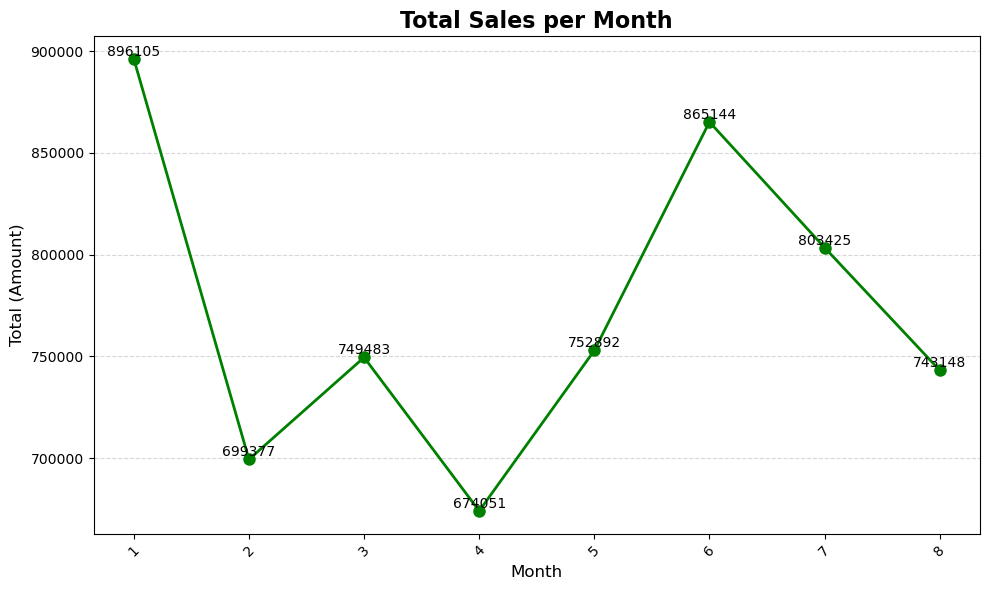

In [114]:
# Group the data by month and sum the values
monthly_amount = df.groupby('Month')['Amount'].sum().sort_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_amount.index, monthly_amount.values, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)

# Add values at the top of each point
for i, value in enumerate(monthly_amount.values):
    plt.text(monthly_amount.index[i], value + 5, f'{value:.0f}', ha='center', va='bottom', fontsize=10)

# Customize the layout
plt.title('Total Sales per Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total (Amount)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

8 - Which product had the highest revenue?

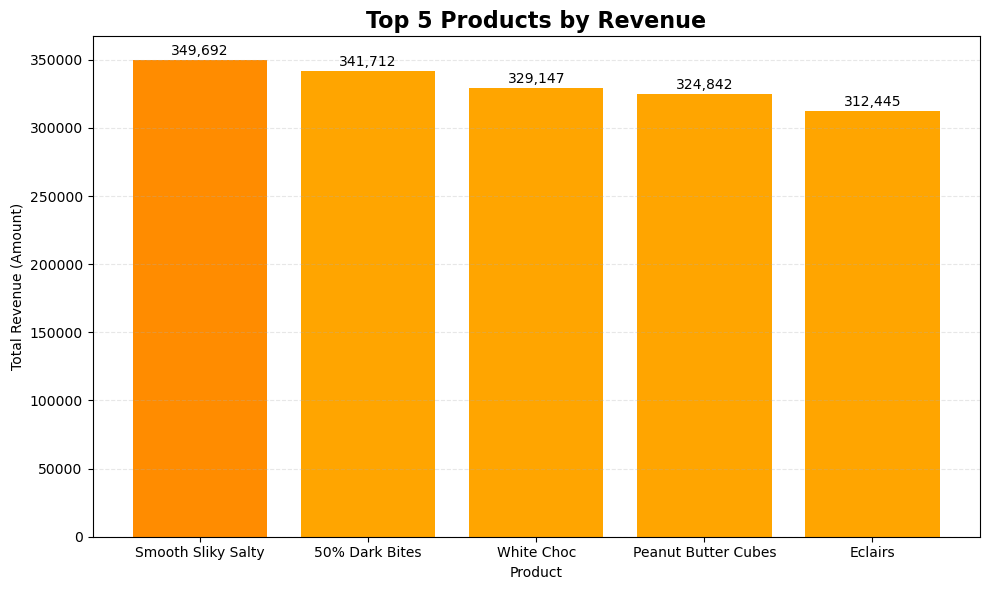

The product with the highest revenue is 'Smooth Sliky Salty' with total revenue of US$349,692.


In [91]:
# Group by Product and sum the Amount (revenue)
revenue_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

# Plot top products — feel free to change `.head(10)` to see more or fewer
top_n = 5
top_revenue_products = revenue_by_product.head(top_n)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_revenue_products.index, top_revenue_products.values, color='orange')

# Add value labels
for i, value in enumerate(top_revenue_products.values):
    ax.text(i, value + max(top_revenue_products.values) * 0.01, f'{value:,.0f}', ha='center')

# Highlight the highest
ax.bar(top_revenue_products.idxmax(), top_revenue_products.max(), color='darkorange')

# Style the plot
ax.set_title(f'Top {top_n} Products by Revenue', fontsize=16, weight='bold')
ax.set_xlabel('Product')
ax.set_ylabel('Total Revenue (Amount)')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the product with highest revenue
top_product = revenue_by_product.idxmax()
top_revenue = revenue_by_product.max()
print(f"The product with the highest revenue is '{top_product}' with total revenue of US${top_revenue:,.0f}.")

9 - What is the unity price?

In [93]:
# Create a new column for Unit Price in case it's not in the dataset
df['Unit Price'] = df['Amount'] / df['Boxes Shipped']

# Now calculate the average unit price per product
unit_price_by_product = df.groupby('Product')['Unit Price'].mean().sort_values(ascending=False)

# Display result
print("Average Unit Price per Product:")
display(round(unit_price_by_product, 2))

Average Unit Price per Product:


Product
White Choc              232.05
Mint Chip Choco         161.58
99% Dark & Pure         146.80
Choco Coated Almonds    120.40
Spicy Special Slims     119.89
Orange Choco            119.71
Eclairs                 117.65
50% Dark Bites          111.75
Fruit & Nut Bars        107.15
85% Dark Bars           103.13
Peanut Butter Cubes      92.30
Organic Choco Syrup      91.18
Baker's Choco Chips      90.84
Raspberry Choco          90.05
Smooth Sliky Salty       88.73
Milk Bars                81.87
Manuka Honey Choco       79.35
After Nines              74.94
Almond Choco             74.75
Caramel Stuffed Bars     74.60
Drinking Coco            62.87
70% Dark Bites           58.79
Name: Unit Price, dtype: float64

10 - What was the most stable month?

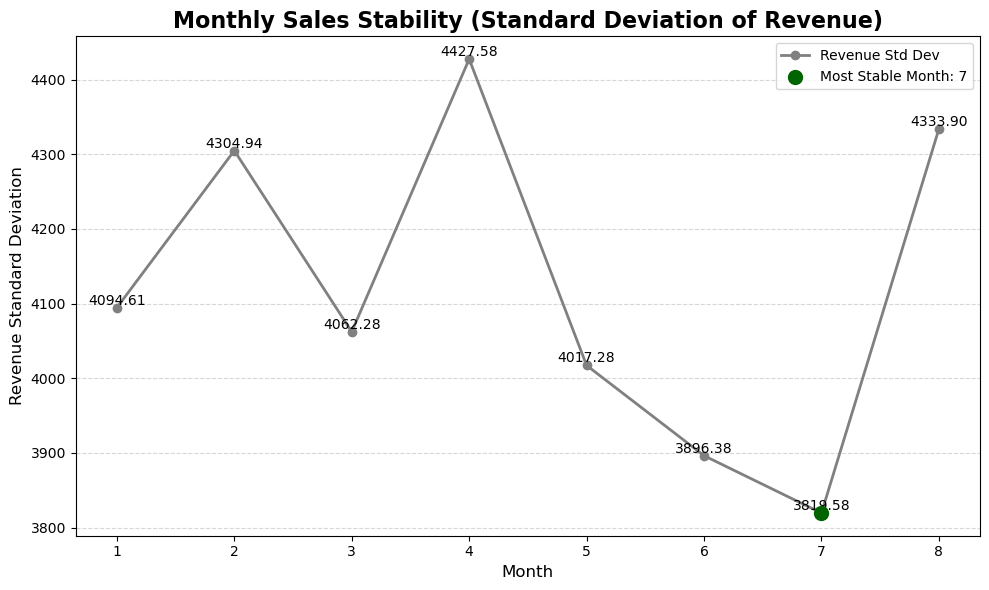

The most stable month was month 7, with a standard deviation of US$3,819.58.


In [118]:
# Group by Month and calculate the standard deviation of Amount (revenue)
monthly_std = df.groupby('Month')['Amount'].std()

# Identify the most stable month
most_stable_month = monthly_std.idxmin()
lowest_std = monthly_std.min()

# Define point colors: green for the most stable month, gray for others
colors = ['darkgreen' if month == most_stable_month else 'gray' for month in monthly_std.index]

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the line with markers
plt.plot(monthly_std.index, monthly_std.values, marker='o', color='gray', linewidth=2, label='Revenue Std Dev')

# Highlight the most stable month
plt.scatter(most_stable_month, lowest_std, color='darkgreen', s=100, zorder=5, label=f'Most Stable Month: {most_stable_month}')

# Add values at the top of each point
for i, value in enumerate(monthly_std.values):
    plt.text(monthly_std.index[i], value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the layout
plt.title('Monthly Sales Stability (Standard Deviation of Revenue)', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue Standard Deviation', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Print result
print(f"The most stable month was month {most_stable_month}, with a standard deviation of US${lowest_std:,.2f}.")